Learning Deep Learning

In [ ]:
!nvidia-smi

Sat May 25 02:44:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0              29W /  70W |    133MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.6.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.7
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.c

In [ ]:
!pip install keras-tuner

In [ ]:
# Importing imp Libraries
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner.tuners import RandomSearch

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
# One hot encoding to the Gender and Geography columns
Geo_ohe = pd.get_dummies(df.Geography,dtype = 'int',prefix = 'Geography')
Gen_ohe = pd.get_dummies(df.Gender,dtype = 'int',prefix = 'Gender')
display(Geo_ohe)
display(Gen_ohe)

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [ ]:
data = pd.concat([df,Geo_ohe,Gen_ohe],axis = 1).drop(['Geography','Gender'], axis = 1)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
 12  Gender_Female      10000 non-null  int64  
 13  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Splitting the data
X = data.drop(['Exited'],axis = 1)
Y = data.Exited

In [ ]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify = Y)

In [ ]:
x_tr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2151,753,57,7,0.00,1,1,0,159475.08,1,0,0,0,1
8392,739,32,3,102128.27,1,1,0,63981.37,0,1,0,0,1
5006,755,37,0,113865.23,2,1,1,117396.25,0,1,0,1,0
4117,561,37,5,0.00,2,1,0,83093.25,1,0,0,0,1
7182,692,49,6,110540.43,2,0,1,107472.99,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,688,35,6,0.00,1,1,0,25488.43,0,0,1,1,0
4644,712,74,5,0.00,2,0,0,151425.82,0,0,1,0,1
8942,667,37,9,71786.90,2,1,1,67734.79,1,0,0,1,0
2935,687,35,8,100988.39,2,1,0,22247.27,0,0,1,0,1


In [ ]:
x_ts

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5702,585,36,7,0.00,2,1,0,94283.09,1,0,0,0,1
3667,525,33,4,131023.76,2,0,0,55072.93,0,1,0,0,1
1617,557,40,4,0.00,2,0,1,105433.53,0,0,1,1,0
5673,639,34,5,139393.19,2,0,0,33950.08,0,0,1,0,1
4272,640,34,3,77826.80,1,1,1,168544.85,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,674,36,2,154525.70,1,0,1,27468.72,1,0,0,0,1
833,634,37,3,111432.77,2,1,1,167032.49,0,1,0,0,1
9719,516,47,9,128298.74,1,0,0,149614.17,0,1,0,1,0
2776,689,39,7,0.00,2,0,0,14917.09,1,0,0,0,1


In [ ]:
y_tr

2151    1
8392    1
5006    0
4117    0
7182    0
       ..
4555    1
4644    0
8942    0
2935    0
6206    0
Name: Exited, Length: 8000, dtype: int64

In [ ]:
# Normalizing the data
normalizer = MinMaxScaler()

x_tr_scaled = pd.DataFrame(normalizer.fit_transform(x_tr), columns = x_tr.columns)
x_ts_scaled = pd.DataFrame(normalizer.transform(x_ts), columns = x_ts.columns)

In [ ]:
x_tr_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.806,0.527027,0.7,0.000000,0.000000,1.0,0.0,0.797394,1.0,0.0,0.0,0.0,1.0
1,0.778,0.189189,0.3,0.428413,0.000000,1.0,0.0,0.319879,0.0,1.0,0.0,0.0,1.0
2,0.810,0.256757,0.0,0.477648,0.333333,1.0,1.0,0.586979,0.0,1.0,0.0,1.0,0.0
3,0.422,0.256757,0.5,0.000000,0.333333,1.0,0.0,0.415448,1.0,0.0,0.0,0.0,1.0
4,0.684,0.418919,0.6,0.463700,0.333333,0.0,1.0,0.537358,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.676,0.229730,0.6,0.000000,0.000000,1.0,0.0,0.127396,0.0,0.0,1.0,1.0,0.0
7996,0.724,0.756757,0.5,0.000000,0.333333,0.0,0.0,0.757144,0.0,0.0,1.0,0.0,1.0
7997,0.634,0.256757,0.9,0.301135,0.333333,1.0,1.0,0.338648,1.0,0.0,0.0,1.0,0.0
7998,0.674,0.229730,0.8,0.423631,0.333333,1.0,0.0,0.111189,0.0,0.0,1.0,0.0,1.0


In [ ]:
x_ts_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.470,0.243243,0.7,0.000000,0.333333,1.0,0.0,0.471403,1.0,0.0,0.0,0.0,1.0
1,0.350,0.202703,0.4,0.549625,0.333333,0.0,0.0,0.275333,0.0,1.0,0.0,0.0,1.0
2,0.414,0.297297,0.4,0.000000,0.333333,0.0,1.0,0.527160,0.0,0.0,1.0,1.0,0.0
3,0.578,0.216216,0.5,0.584733,0.333333,0.0,0.0,0.169709,0.0,0.0,1.0,0.0,1.0
4,0.580,0.216216,0.3,0.326472,0.000000,1.0,1.0,0.842747,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.648,0.243243,0.2,0.648212,0.000000,0.0,1.0,0.137299,1.0,0.0,0.0,0.0,1.0
1996,0.568,0.256757,0.3,0.467444,0.333333,1.0,1.0,0.835184,0.0,1.0,0.0,0.0,1.0
1997,0.332,0.391892,0.9,0.538194,0.000000,0.0,0.0,0.748084,0.0,1.0,0.0,1.0,0.0
1998,0.678,0.283784,0.7,0.000000,0.333333,0.0,0.0,0.074535,1.0,0.0,0.0,0.0,1.0


In [ ]:
#____________Generating Basic Stucture of Model____________-
# Initializing the model
model = tf.keras.Sequential()

#Adding the Input Layer
model.add(tf.keras.layers.Input(shape = (13,) ))

# Adding the Hidden Layer
# Hidden Layer - I
model.add(tf.keras.layers.Dense(units = 6,
                                activation = 'relu',
                                kernel_initializer = 'he_normal'))
# Hidden Layer - II
model.add(tf.keras.layers.Dense(units = 10,
                                activation = 'relu',
                                kernel_initializer = 'he_normal'))
#Adding the Output Layer
model.add(tf.keras.layers.Dense(units = 1,
                                activation = 'sigmoid',
                                kernel_initializer = 'glorot_normal'))

#__________________________Compiling the Model___________________
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Precision','Recall'])

In [ ]:
# Summarizing the Structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 84        
                                                                 
 dense_8 (Dense)             (None, 10)                70        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 165 (660.00 Byte)
Trainable params: 165 (660.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
hist_obj = model.fit( x = x_tr_scaled,
                     y = y_tr,
                      batch_size = 64,
                      epochs = 100,
                      validation_data = (x_ts_scaled,y_ts),
                      validation_batch_size = 64,
                      use_multiprocessing = True,
                      workers = 20)

Epoch 1/100
125/125 [==============================] - 2s 8ms/step - loss: 0.5943 - accuracy: 0.7449 - precision: 0.1872 - recall: 0.0755 - val_loss: 0.5146 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
125/125 [==============================] - 1s 6ms/step - loss: 0.4983 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4938 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
125/125 [==============================] - 1s 8ms/step - loss: 0.4826 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4834 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4747 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4766 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
125/125 [=======================

In [ ]:
# Visulizing Performance based on Historic Model
def visualizer(hist_obj,parameter):
  plt.figure(figsize = (18,10))
  train_param = hist_obj.history.get(parameter)
  val_param = hist_obj.history.get(f'val_{parameter}')
  epochs = hist_obj.epoch

  sns.lineplot(x = epochs, y = train_param)
  sns.lineplot(x = epochs, y = val_param)

  plt.legend(labels = [parameter,f'val_{parameter}'])
  plt.xticks(ticks = epochs, labels = epochs, rotation = 90)
  # rotation used= 90 means for word alignment
  plt.yticks(ticks = [i/100 for i in range(10,110,10)],labels = [i/100 for i in range (10,110,10)])
  plt.show()

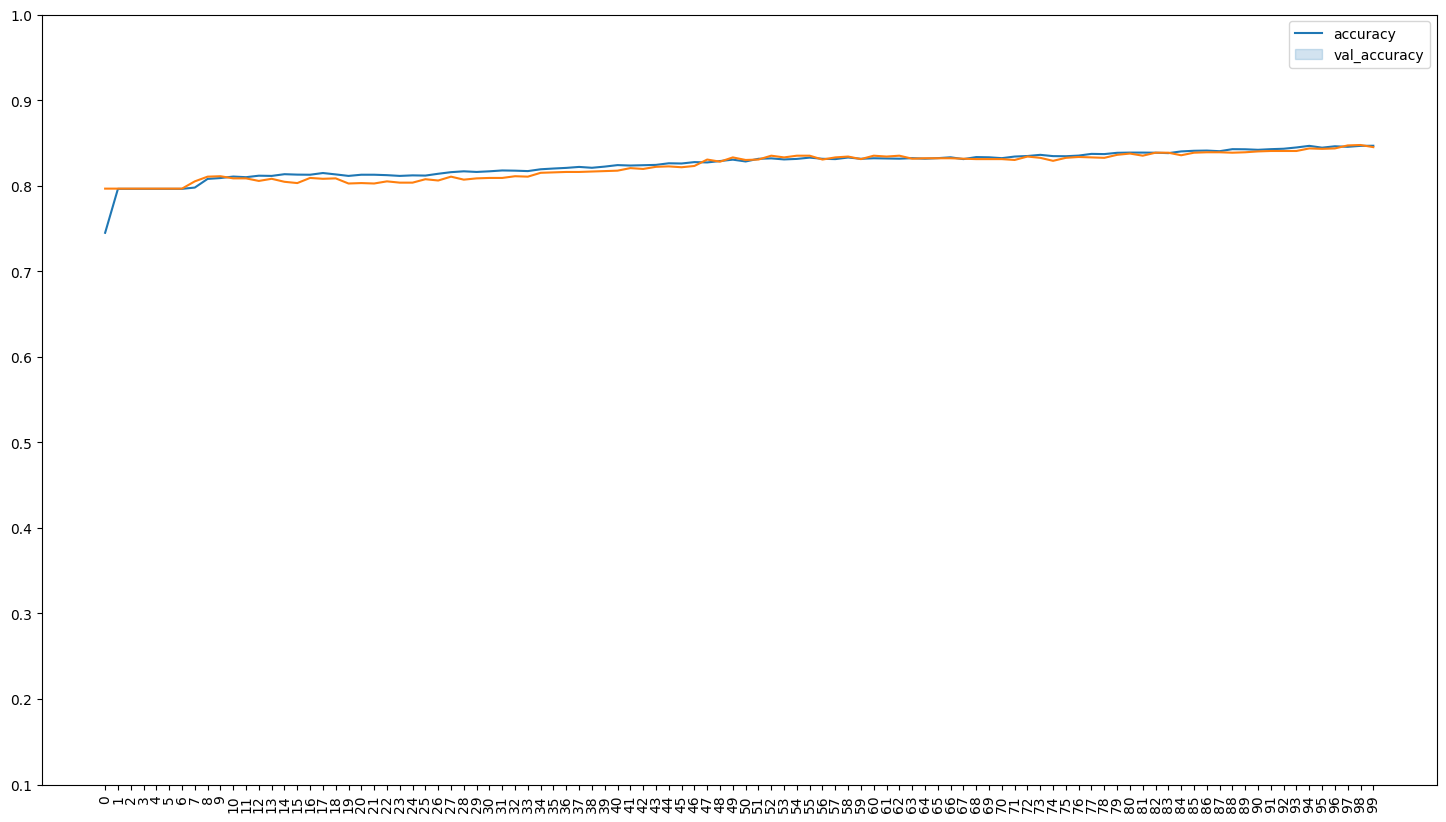

In [ ]:
visualizer(hist_obj = hist_obj,parameter = 'accuracy')

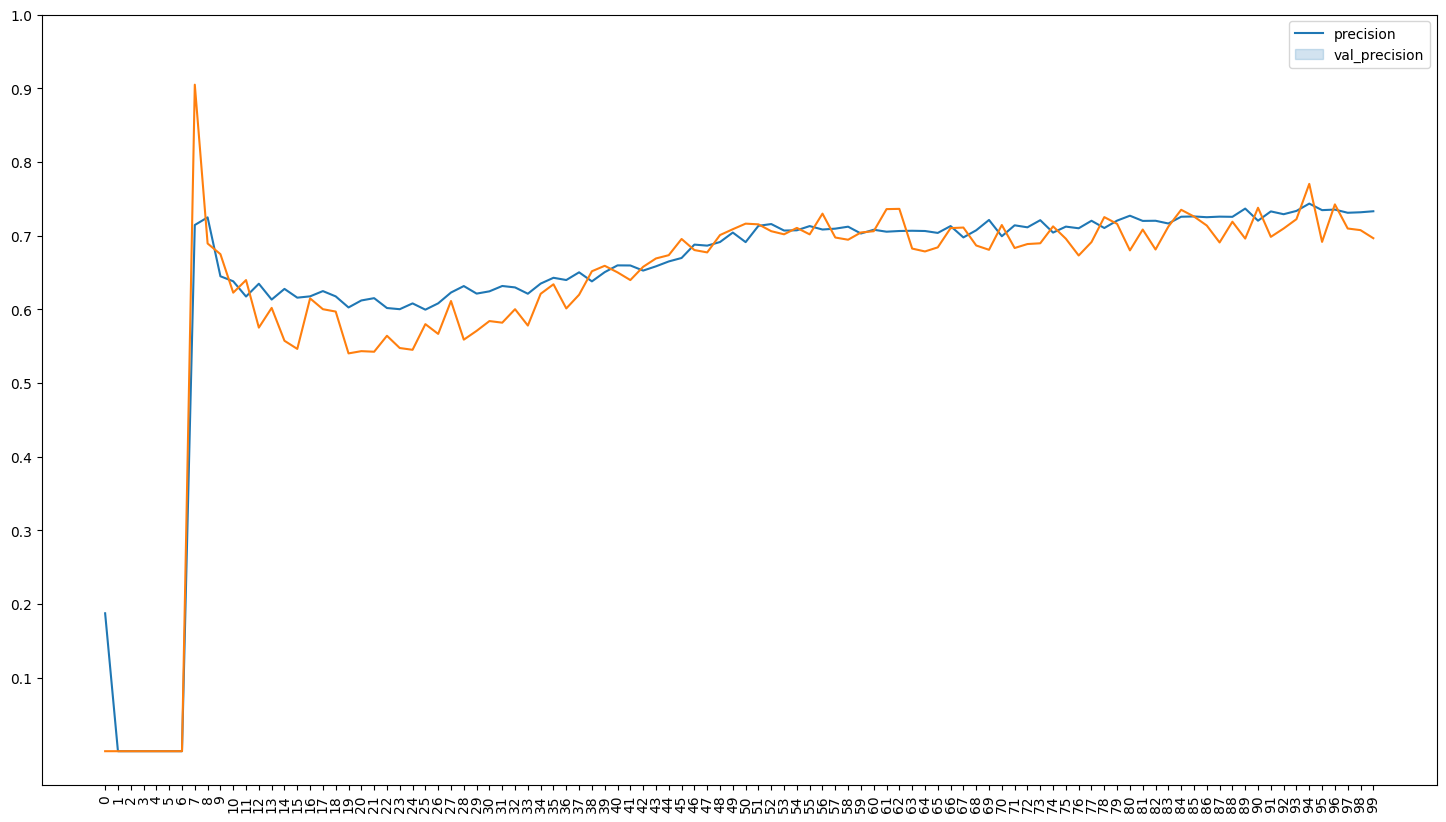

In [ ]:
visualizer(hist_obj = hist_obj,parameter = 'precision')

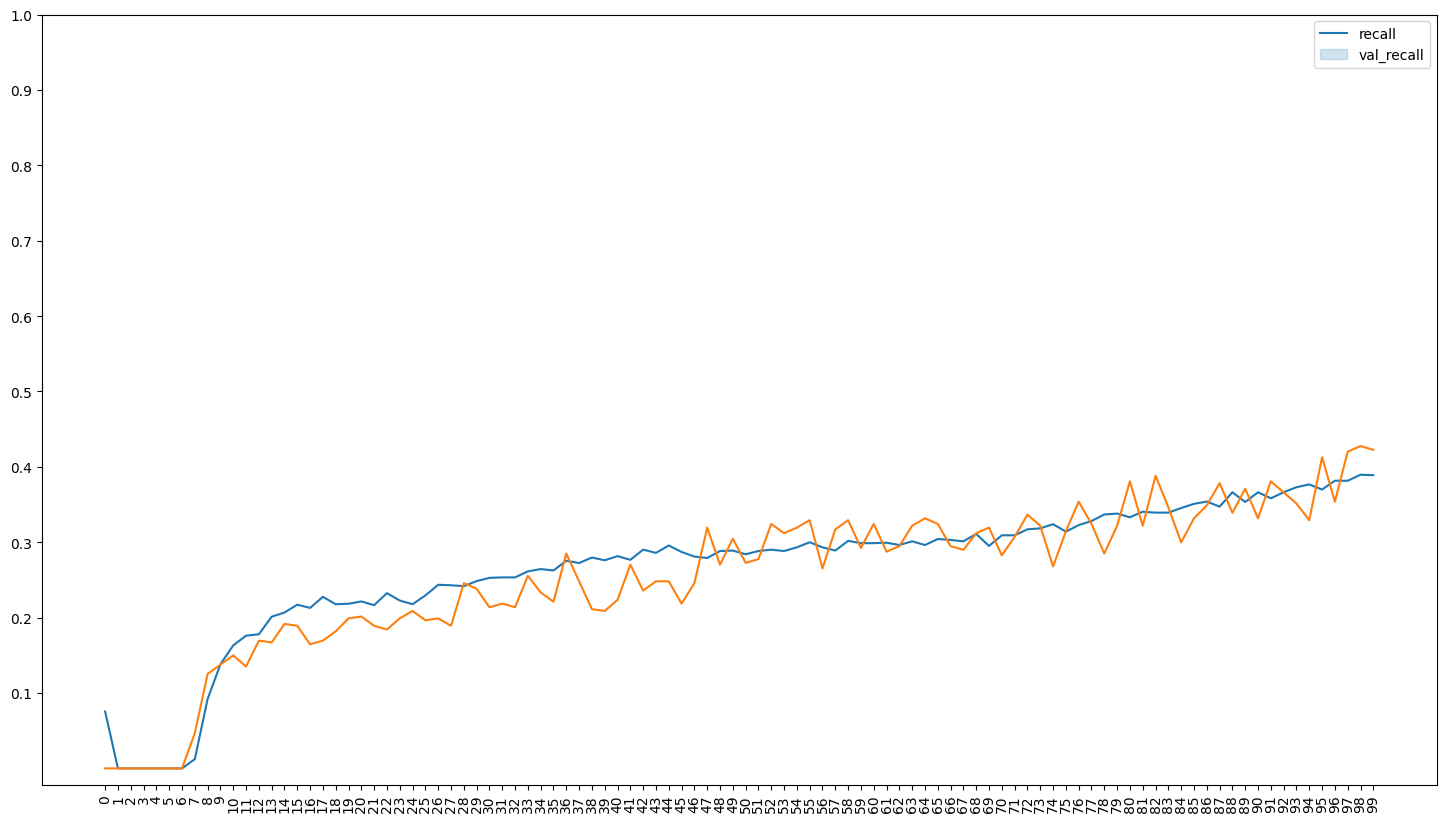

In [ ]:
visualizer(hist_obj = hist_obj,parameter = 'recall')

Early Stopping - To overcome the problem of Overfitting

In [ ]:
early_stpper = EarlyStopping(monitor = 'accuracy', patience = 10)
# Here,patience indicate upto which epoch we have to weight

In [ ]:
# Improving compare to hist_obj
hist_obj_2 = model.fit( x = x_tr_scaled,
                       y = y_tr,
                        batch_size = 64,
                        epochs = 100,
                        validation_data = (x_ts_scaled,y_ts),
                        validation_batch_size =16,
                        use_multiprocessing = True,
                        workers = 20,
                        callbacks = [early_stpper])

Epoch 1/100
125/125 [==============================] - 1s 9ms/step - loss: 0.3639 - accuracy: 0.8497 - precision: 0.7443 - recall: 0.4000 - val_loss: 0.3604 - val_accuracy: 0.8495 - val_precision: 0.7524 - val_recall: 0.3882
Epoch 2/100
125/125 [==============================] - 1s 8ms/step - loss: 0.3643 - accuracy: 0.8484 - precision: 0.7335 - recall: 0.4018 - val_loss: 0.3625 - val_accuracy: 0.8455 - val_precision: 0.6815 - val_recall: 0.4521
Epoch 3/100
125/125 [==============================] - 1s 9ms/step - loss: 0.3639 - accuracy: 0.8486 - precision: 0.7383 - recall: 0.3982 - val_loss: 0.3582 - val_accuracy: 0.8505 - val_precision: 0.7348 - val_recall: 0.4152
Epoch 4/100
125/125 [==============================] - 1s 12ms/step - loss: 0.3616 - accuracy: 0.8484 - precision: 0.7264 - recall: 0.4104 - val_loss: 0.3572 - val_accuracy: 0.8505 - val_precision: 0.7368 - val_recall: 0.4128
Epoch 5/100
125/125 [==============================] - 1s 10ms/step - loss: 0.3611 - accuracy: 0.85

In [ ]:
# Improving compare to hist_obj_2
hist_obj_3 = model.fit( x = x_tr_scaled,
                       y = y_tr,
                        batch_size = 64,
                        epochs = 37,
                        validation_data = (x_ts_scaled,y_ts),
                        validation_batch_size =16,
                        use_multiprocessing = True,
                        workers = 20,
                        )

Epoch 1/37
125/125 [==============================] - 1s 11ms/step - loss: 0.3394 - accuracy: 0.8602 - precision: 0.7545 - recall: 0.4656 - val_loss: 0.3351 - val_accuracy: 0.8620 - val_precision: 0.7937 - val_recall: 0.4349
Epoch 2/37
125/125 [==============================] - 1s 11ms/step - loss: 0.3392 - accuracy: 0.8594 - precision: 0.7661 - recall: 0.4460 - val_loss: 0.3357 - val_accuracy: 0.8610 - val_precision: 0.7380 - val_recall: 0.4914
Epoch 3/37
125/125 [==============================] - 1s 10ms/step - loss: 0.3395 - accuracy: 0.8596 - precision: 0.7638 - recall: 0.4503 - val_loss: 0.3354 - val_accuracy: 0.8645 - val_precision: 0.7982 - val_recall: 0.4472
Epoch 4/37
125/125 [==============================] - 1s 10ms/step - loss: 0.3390 - accuracy: 0.8596 - precision: 0.7671 - recall: 0.4466 - val_loss: 0.3352 - val_accuracy: 0.8645 - val_precision: 0.7857 - val_recall: 0.4595
Epoch 5/37
125/125 [==============================] - 1s 11ms/step - loss: 0.3401 - accuracy: 0.8580

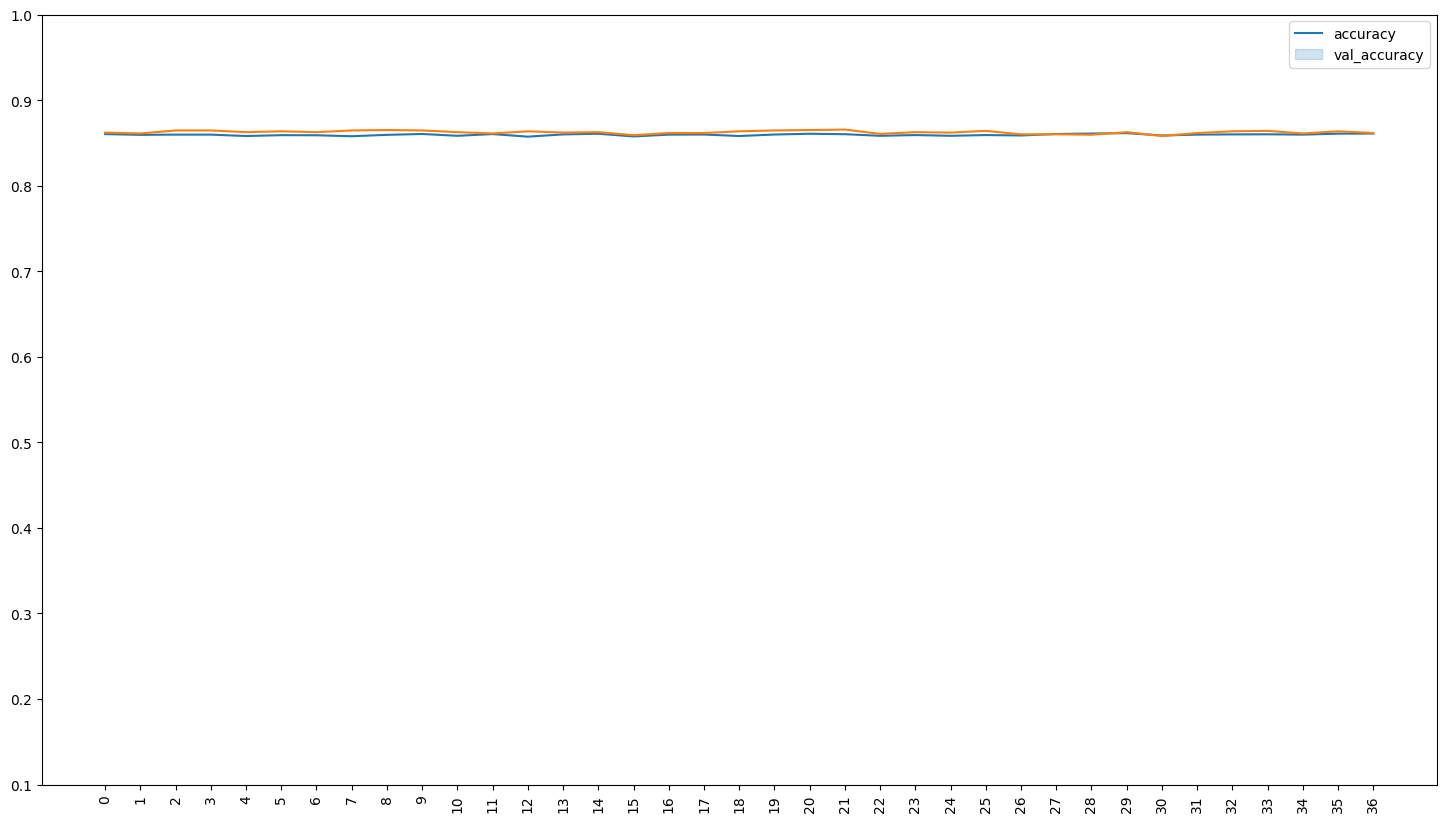

In [ ]:
# Visually checking over the 3rd model
visualizer(hist_obj = hist_obj_3,parameter = 'accuracy')

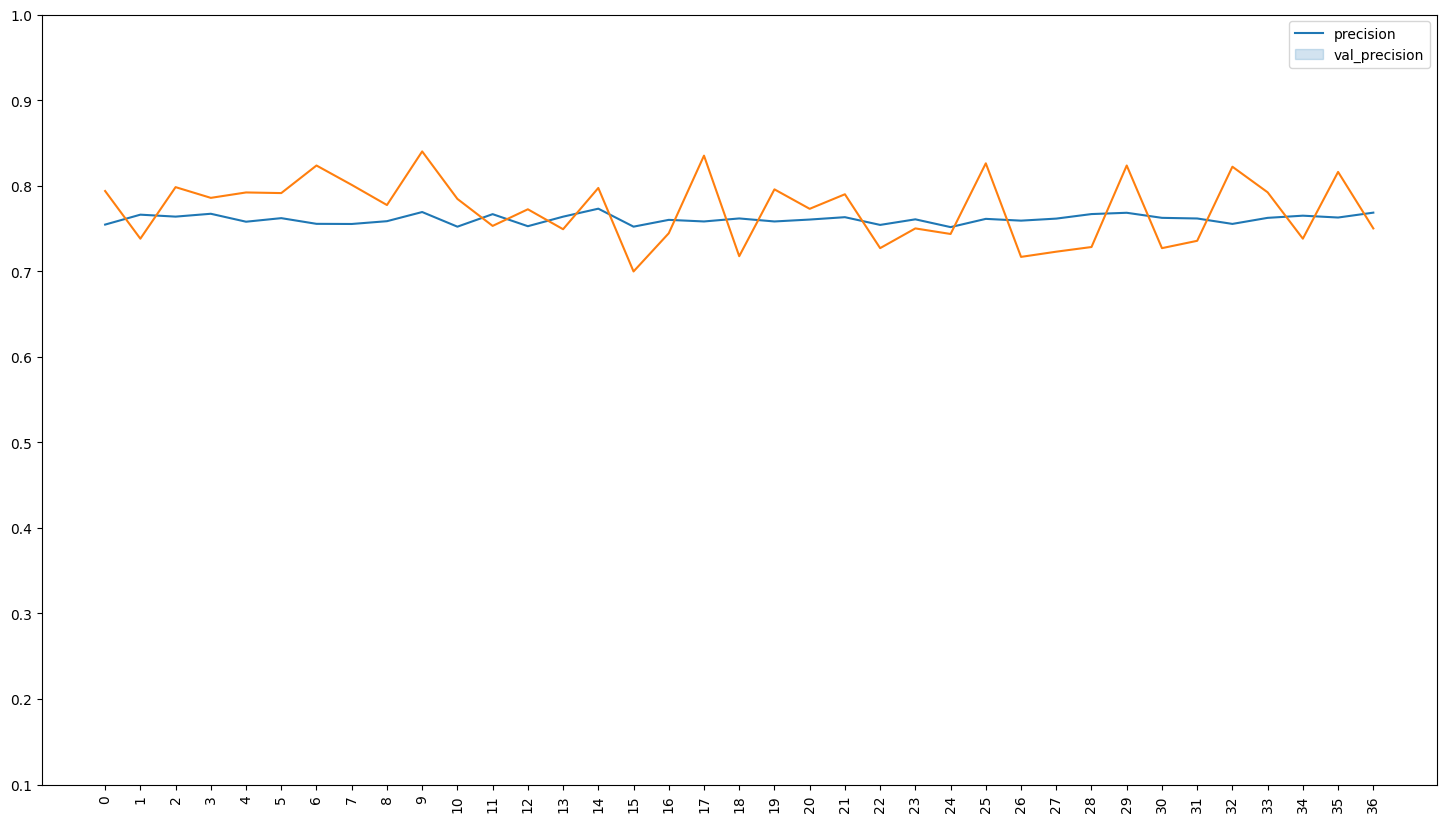

In [ ]:
visualizer(hist_obj = hist_obj_3,parameter = 'precision')

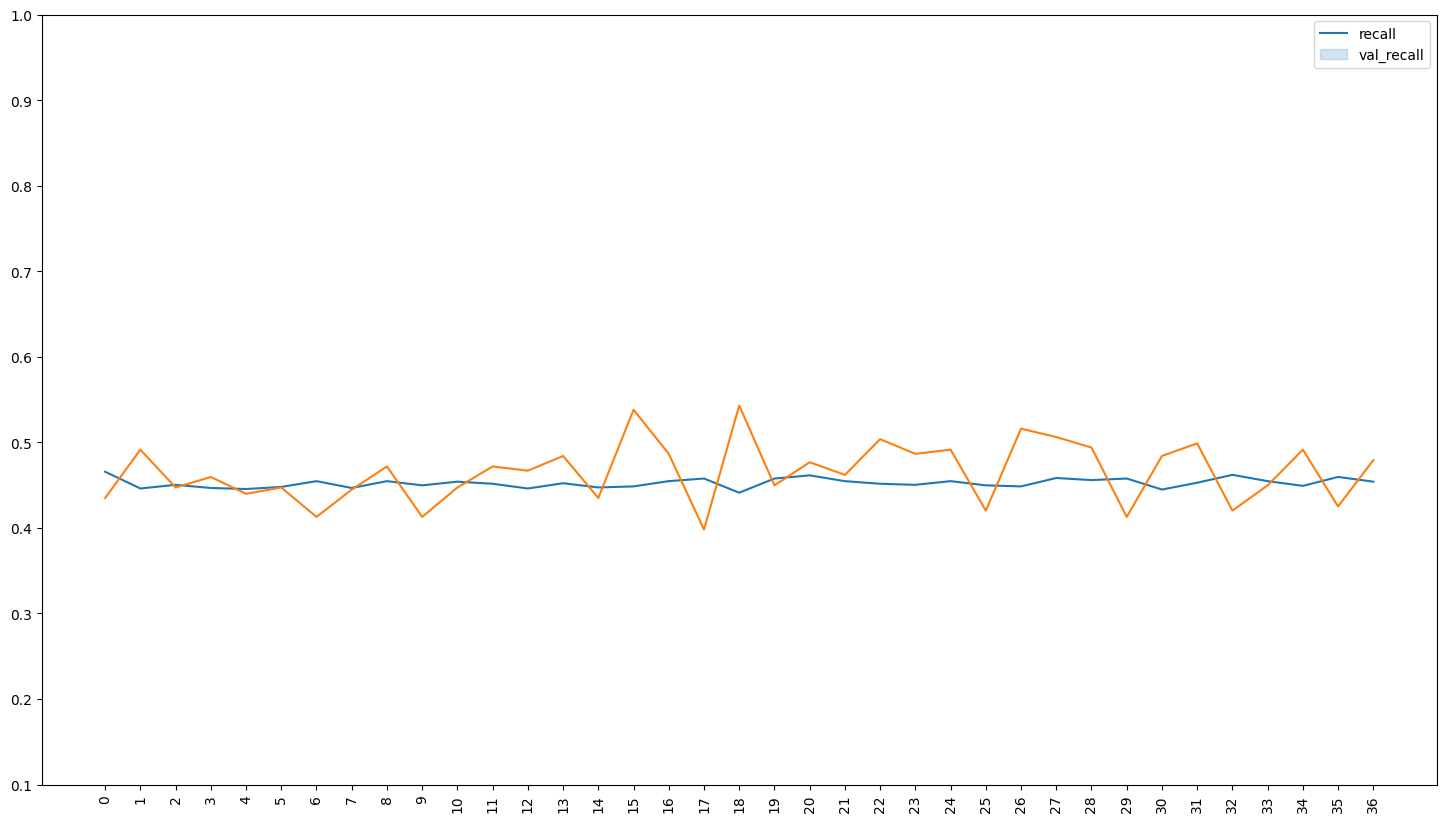

In [ ]:
visualizer(hist_obj = hist_obj_3,parameter = 'recall')

In [ ]:
# when unable to get which to follows use the Hyperparameter Tuning

In [ ]:
# hyp.Choice(list_of_element)
#hyp.Int(range of element)

In [ ]:
def hypermodel(hyp):
  #Initializing the model
  model = tf.keras.Sequential()

  # Adding the input layer
  model.add(tf.keras.layers.Input(shape = (13,)))

  #Adding the Hidden Layer
  for layer_num in range(hyp.Int('number of hidden layer',
                                 min_value = 1,
                                 max_value = 18)):
    model.add(tf.keras.layers.Dense(units = hyp.Int(f'number of neurons in layer {layer_num}',
                                                    min_value = 4,
                                                    max_value = 20,
                                                    step = 4),
                                     activation = hyp.Choice(f'activation function in layer {layer_num}',
                                                             ['sigmoid','relu']),
                                    kernel_initializer = hyp.Choice(f'kernel initializer for layer {layer_num}',
                                                                    ['he_normal','he_uniform','glorot_uniform','glorot_normal'])))

  # Adding the Output layer
  model.add(tf.keras.layers.Dense(units = 1,
                                  activation = 'sigmoid',
                                  kernel_initializer = hyp.Choice('kernel initializer for output layer',['he_normal','he_uniform','glorot_uniform','glorot_normal'])))


  # Compiling the model
  model.compile(optimizer = 'Adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy','Precision','Recall'])

  return model

In [ ]:
# Generating the Tuner Object
tuner = RandomSearch(hypermodel = hypermodel,
                     objective = 'accuracy')

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
# Summarizing the tunner object
tuner.search_space_summary()

Search space summary
Default search space size: 50
number of hidden layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 18, 'step': 1, 'sampling': 'linear'}
number of neurons in layer 0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 20, 'step': 4, 'sampling': 'linear'}
activation function in layer 0 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
kernel initializer for layer 0 (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_uniform', 'glorot_normal'], 'ordered': False}
kernel initializer for output layer (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_uniform', 'glorot_normal'], 'ordered': False}
number of neurons in layer 1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 20, 'step': 4, 'sampling': 'linear'}
activation function in layer 1 (Choice)
{'default': 'sigmoi

In [ ]:
# Tuning the model
tuner.search(x_tr_scaled,y_tr,epochs = 37,batch_size = 64)

In [ ]:
# Fetching the best model
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [ ]:
# Model Evaluation on training side
evaluate = best_model.evaluate(x = x_tr_scaled, y = y_tr, batch_size = 64)

125/125 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.8608 - precision: 0.7892 - recall: 0.4319


In [ ]:
# Model Evaluation on testing side
evaluate = best_model.evaluate(x = x_ts_scaled,y = y_ts,batch_size = 16)


125/125 [==============================] - 1s 4ms/step - loss: 0.3480 - accuracy: 0.8600 - precision: 0.7926 - recall: 0.4226


In [ ]:
y_ts.value_counts()

Exited
0    1593
1     407
Name: count, dtype: int64

In [ ]:
exited_rate = (407/2000)*100
exited_rate

20.349999999999998

In [ ]:
y_preds = best_model.predict(x_ts_scaled)
y_preds

63/63 [==============================] - 0s 3ms/step


array([[0.0280594 ],
       [0.0428825 ],
       [0.04392894],
       ...,
       [0.6464623 ],
       [0.02735946],
       [0.05431497]], dtype=float32)

In [ ]:
y_pred_final = list(map(int, y_preds > 0.3))
y_pred_final

<ipython-input-143-c60bf5f1b9af>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_final = list(map(int, y_preds > 0.3))


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


In [ ]:
y_pred_final_array = np.array(y_pred_final)

In [ ]:
# Model Evaluation on testing side
evaluate = best_model.evaluate(x = x_ts_scaled,y = y_pred_final_array,batch_size = 16)

125/125 [==============================] - 2s 6ms/step - loss: 0.1957 - accuracy: 0.9150 - precision: 1.0000 - recall: 0.5607


In [ ]:
# Saving the model
# Creating the new directory for model weights

model_weight_dir = 'Weights'
os.makedirs(model_weight_dir,exist_ok = True)

# Saving the model weights
best_model.save(os.path.join(model_weight_dir, 'Best_model.tf'),save_format = 'tf')

In [ ]:
# Loading the Model
loaded_model = tf.keras.models.load_model('/content/Weights/Best_model.tf')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 1)                 1